<a href="https://colab.research.google.com/github/ayeshagunarathne/Vision-Transformers/blob/main/Math_Behind_Vit_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a brief explanation about the mathematical concepts used in the architecture of the paper :  [An image is worth 16x16 words:Transformers for image recognition at scale]( https://arxiv.org/abs/2010.11929)

Shown below is the Vit architecture shown in the paper.This entire architecture can be explained using four equations given below.

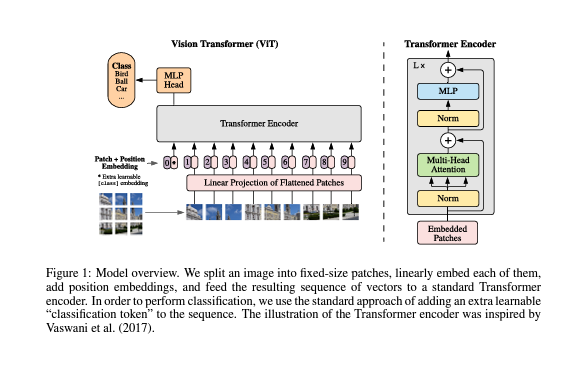


##**MATH BEHIND THE VIT ARCHITECTURE (briefly explained)**



\begin{aligned}
\mathbf{z}_0 & =\left[\mathbf{x}_{\mathrm{class} ;} \mathbf{x}_p^1 \mathbf{E} ; \mathbf{x}_p^2 \mathbf{E} ; \cdots ; \mathbf{x}_p^N \mathbf{E}\right]+\mathbf{E}_{p o s}, & & \mathbf{E} \in \mathbb{R}^{\left(P^2 . C\right) \times D}, \mathbf{E}_{p o s} \in \mathbb{R}^{(N+1) \times D} \\
\mathbf{z}_{\ell}^{\prime} & =\operatorname{MSA}\left(\operatorname{LN}\left(\mathbf{z}_{\ell-1}\right)\right)+\mathbf{z}_{\ell-1}, & & \ell=1 \ldots L \\
\mathbf{z}_{\ell} & =\operatorname{MLP}\left(\operatorname{LN}\left(\mathbf{z}_{\ell}^{\prime}\right)\right)+\mathbf{z}_{\ell}^{\prime}, & & \ell=1 \ldots L \\
\mathbf{y} & =\operatorname{LN}\left(\mathbf{z}_L^0\right) & &
\end{aligned}

Four equations above  ( From section 3.1 of the original paper)
 explain the math behind the Vit architecture
##**Equation 1:**
\begin{aligned}
\mathbf{z}_0 & =\left[\mathbf{x}_{\mathrm{class} ;} \mathbf{x}_p^1 \mathbf{E} ; \mathbf{x}_p^2 \mathbf{E} ; \cdots ; \mathbf{x}_p^N \mathbf{E}\right]+\mathbf{E}_{p o s}, & & \mathbf{E} \in \mathbb{R}^{\left(P^2 . C\right) \times D}, \mathbf{E}_{p o s} \in \mathbb{R}^{(N+1) \times D} \\
\end{aligned}


This explains the process of patch embedding and positional enconding.The output of this equation is the patch embeddings that we input to transformer encoder.

**The entire process happening here can be summarised as follows:**

The input image of size(in this case it is 224x224 RGB image) is splitted into pathes(for example to size of 16x16).The pixel values are then flattend and fed into a trainable linear projection.(In the paper this is done using a convolutional layer)

The reason for a linear projection is,the transformer use a **constant latent vector size** and the patches that we input into it needs to be of same vector size.

$\mathbf{z}_0$ = The output of the patch embedding ($\mathbf{Z}_0 \in \mathbb{R}^{N+1 \times D}$)

$\mathbf{x}_\mathrm{class}$ = The class token ( $\mathbf{x}_\mathrm{class}$ =$\mathbf{z}_0^0$ , $\mathbf{Z}_0^0 \in \mathbb{R}^{1 \times D}$ )


$\mathbf{x}_p^1$ - $\mathbf{x}_p^N$ = The flattened  image patch vectors (Here **N** represent the total no of image patches. **N =  (HxW**/ $\mathbf{P}^2$ )
Where H and W is the height and width of the original image and P is the patch size.(The H and W should be divisible by P). $\mathbf{x}_p \in \mathbb{R}^{N \times\left(P^2 \cdot C\right)}$ , C = No of color channels,in this case it is 3.)

**$\mathbf{E}$** = The learnable embedding matrix. (**$\mathbf{E} \in \mathbb{R}^{\left(P^2 . C\right) \times D}$** ,E is a weight matrix that projects the flattened patch vectors into a new latent space of dimension D. This dimensionality D is usually chosen to match the size of the hidden states in the transformer model.)

$\mathbf{E}_{p o s}$ = Learnable 1D positional embedding ($\mathbf{E}_{p o s} \in \mathbb{R}^{N+1 \times D}$)

[Quoted from section 3.1 of original paper - " Position embeddings are added to the patch embeddings to retain positional information. We use standard learnable 1D position embeddings, since we have not observed significant performance gains from using more advanced 2D-aware position embeddings (Appendix D.4). The resulting sequence of embedding vectors serves as input to the encoder." and ", the position embeddings at initialization time carry no information about the 2D positions of the patches and all spatial relations between the patches have to be learned from scratch."]

This entire process can be shown in simple vector form as follows:

**The output of Patch embedding = [ Class token , Embedding of patch 1,Embedding of patch 2,......Embedding of patch N ] + [Positional Embedding of class token,Positional embedding of patch 1,Positional emnedding of patch 2.......Positional emnedding of patch N]**









##**Equation 2 and 3**

Equation 2 and 3 explain the process happening inside the Transformer encoder

\begin{aligned}
\mathbf{z}_{\ell}^{\prime} & =\operatorname{MSA}\left(\operatorname{LN}\left(\mathbf{z}_{\ell-1}\right)\right)+\mathbf{z}_{\ell-1}, & & \ell=1 \ldots L \\
\mathbf{z}_{\ell} & =\operatorname{MLP}\left(\operatorname{LN}\left(\mathbf{z}_{\ell}^{\prime}\right)\right)+\mathbf{z}_{\ell}^{\prime}, & & \ell=1 \ldots L \\
\end{aligned}

**MSA** - Multi-head self attention

**LN** - layer normalization

**MLP** - Multi layer perceptron

$\mathbf \ell=1 \ldots L$  = The index of layer

In each transformer encoder block there are alternating layers of MSA,LN and MLP.LN is applied before every block and residual connections are applied after every block.



A single transformer encoder block looks like this.
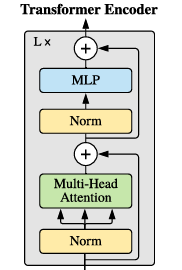

The Norm layer =  LN,
Multi-Head Attention layer = MSA,
The + connection =  residual connection


#### **Equation 2**

This means that there L number of layers of Multi-Head attention(MSA) and each of this layer has a layer normalization beforehand and a residual connection afterwards.

In brief this equation explains the process of one MSA block of transformer encoder.We can simply explain this equation using a pseudo code as follows.

Let's look at the 1st MSA block( here $\mathbf{\ell} = 1$):

\begin{aligned}
\mathbf{z}_{1}^{\prime} & =\operatorname{MSA}\left(\operatorname{LN}\left(\mathbf{z}_{0}\right)\right)+\mathbf{z}_{0}
\end{aligned}

Here $\mathbf{z}_{0}$ means the output of the equation 1 above(the patch embeddings).

#### **Equation 3**

This equation focus on the MLP block of the encoder.There are L number of MLP layers and each of this layer has a layer normalization prior to MLP block and a residual connection after the MLP block.

The 1st MLP block can be shown as follows(here $\mathbf{\ell} = 1$):

\begin{aligned}
\mathbf{z}_{1} & =\operatorname{MLP}\left(\operatorname{LN}\left(\mathbf{z}_1^{\prime}\right)\right)+\mathbf{z}_1^{\prime}
\end{aligned}

Here $\mathbf{z}_{1}$ means the output of the 1st transformer encoder block
and $\mathbf{z}_{1}^{\prime}$ is the output of the 1st MSA block,which is given as the input for the 1st MLP block.





##**Equation 4**

\begin{aligned}
\mathbf{y} & =\operatorname{LN}\left(\mathbf{z}_L^0\right)
\end{aligned}


This is the output layer.

$\mathbf{z}_L^0$ = This is the output at the index 0 of the last layer of the encoder

Finally a layer normalization is applied for $\mathbf{z}_L^0$ and it will be the final output of the Vit architecture.

